In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://data.census.gov/table?q=DP03&g=0400000US25_1600000US2507000&tid=ACSDP1Y2021.DP03
# df = pd.read_csv('./data/ACSDP1Y2021.DP03-2023-02-27T203110.csv')

# https://data.census.gov/table?t=Income+and+Poverty&g=040XX00US25&tid=ACSST1Y2021.S1702
df = pd.read_csv('./data/ACSST1Y2021.S1702-2023-03-30T170636.csv').rename({
    'Label (Grouping)': 'Label',
    'Boston city, Massachusetts!!All families!!Percent below poverty level!!Estimate': 'Percent below poverty level',
    'Boston city, Massachusetts!!All families!!Total!!Estimate': 'Total'
}, axis=1)


In [43]:
df

,Label,"Boston city, Massachusetts!!All families!!Total!!Estimate","Boston city, Massachusetts!!All families!!Total!!Margin of Error",Percent below poverty level,"Boston city, Massachusetts!!All families!!Percent below poverty level!!Margin of Error","Boston city, Massachusetts!!Married-couple families!!Total!!Estimate","Boston city, Massachusetts!!Married-couple families!!Total!!Margin of Error","Boston city, Massachusetts!!Married-couple families!!Percent below poverty level!!Estimate","Boston city, Massachusetts!!Married-couple families!!Percent below poverty level!!Margin of Error","Boston city, Massachusetts!!Female householder, no spouse present!!Total!!Estimate","Boston city, Massachusetts!!Female householder, no spouse present!!Total!!Margin of Error","Boston city, Massachusetts!!Female householder, no spouse present!!Percent below poverty level!!Estimate","Boston city, Massachusetts!!Female householder, no spouse present!!Percent below poverty level!!Margin of Error"
0,Families,"121,536","±4,704",13.7%,±1.8,"74,624","±4,000",7.3%,±1.5,"36,475","±2,744",27.9%,±4.5
1,With related children of householder under...,"53,316","±3,359",19.3%,±3.3,"27,651","±2,710",6.4%,±2.5,"21,817","±2,054",36.0%,±5.7
2,With related children of householder u...,"11,489","±1,781",11.4%,±6.7,"8,533","±1,714",0.0%,±2.3,"2,411",±972,54.5%,±21.7
3,With related children of householder u...,"8,321","±1,588",39.2%,±11.4,"3,441","±1,013",12.3%,±9.8,"4,563","±1,380",59.4%,±14.8
4,With related children of householder 5...,"33,506","±2,636",17.1%,±3.8,"15,677","±2,062",8.5%,±4.1,"14,843","±1,738",25.9%,±6.4
5,RACE AND HISPANIC OR LATINO ORIGIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Families with a householder who is--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,White alone,"48,861","±3,169",5.2%,±1.5,"37,207","±2,719",2.7%,±1.3,"8,249","±1,574",18.2%,±7.3
8,Black or African American alone,"27,505","±2,117",11.6%,±4.0,"12,264","±1,766",3.3%,±3.0,"11,876","±1,909",20.6%,±7.6
9,American Indian and Alaska Native ...,N,N,N,N,N,N,N,N,N,N,N,N


In [74]:
df[['Label', 'Total', 'Percent below poverty level']].loc[0]


Label                          Families
Total                           121,536
Percent below poverty level       13.7%
Name: 0, dtype: object

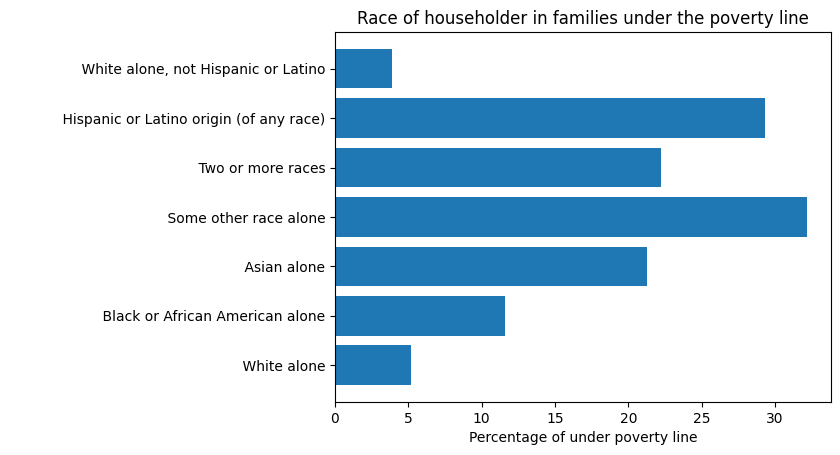

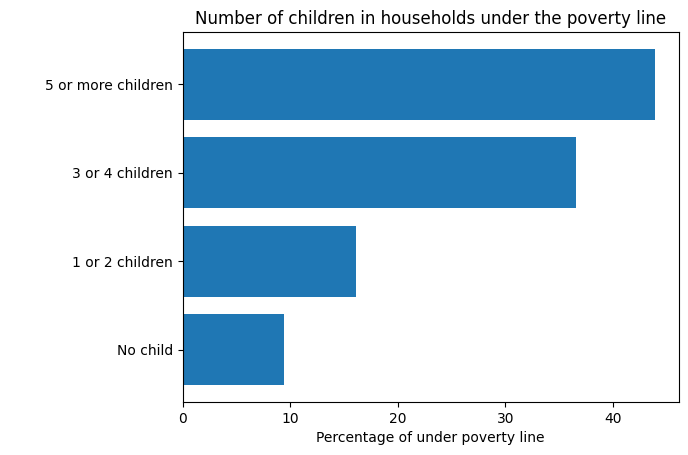

In [102]:
# pd.set_option('display.max_rows', None)

def make_chart(start, end, title):
    fig, ax = plt.subplots()

    below_pov_level = pd.DataFrame(df[['Label', 'Percent below poverty level']].loc[start:end]
                                .query('`Percent below poverty level` != "N"'))

    below_pov_level['Percent below poverty level'] = below_pov_level['Percent below poverty level'].str.replace(
        '\%', '', regex=True).astype(float)

    plt.title(title)
    ax.set_xlabel('Percentage of under poverty line')
    plt.barh(below_pov_level['Label'],
            below_pov_level['Percent below poverty level'])

    # plt.savefig('percentage_below_poverty_line_by_householder_race')
    # plt.savefig(title)
    plt.show()


# pd.DataFrame(df[['Percent below poverty level']]\
#             .loc[7:15]\
#              .query('`Percent below poverty level` != "N"'))['Percent below poverty level']\
#     .str.replace(
#     '\%', '', regex=True).astype(float).sum()



make_chart(7, 15, 'Race of householder in families under the poverty line')
make_chart(28, 31, 'Number of children in households under the poverty line')
